# #Load and Explore the Dataset

In [10]:
!pip install pandas
!pip install scikit-learn


In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('irisflowerdataset.csv')

X = data.drop('species', axis=1)
y = data['species']


from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)


# #Train Supervised Models

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

y_pred_lr = lr_classifier.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr, average='weighted')
recall_lr = recall_score(y_test, y_pred_lr, average='weighted')

# Print evaluation metrics
print("Decision Tree Classifier:")
print("Accuracy:", accuracy_dt)
print("Precision:", precision_dt)
print("Recall:", recall_dt)

print("\nRandom Forest Classifier:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)

print("\nLogistic Regression Classifier:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)


Decision Tree Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Random Forest Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0

Logistic Regression Classifier:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


# #check for overlifting

Decision Tree Classifier - Training Set Accuracy: 1.0
Decision Tree Classifier - Cross-Validation Scores: [0.95833333 1.         0.83333333 0.95833333 0.95833333]
Mean Cross-Validation Score: 0.9416666666666668
Standard Deviation of Cross-Validation Scores: 0.05651941652604389


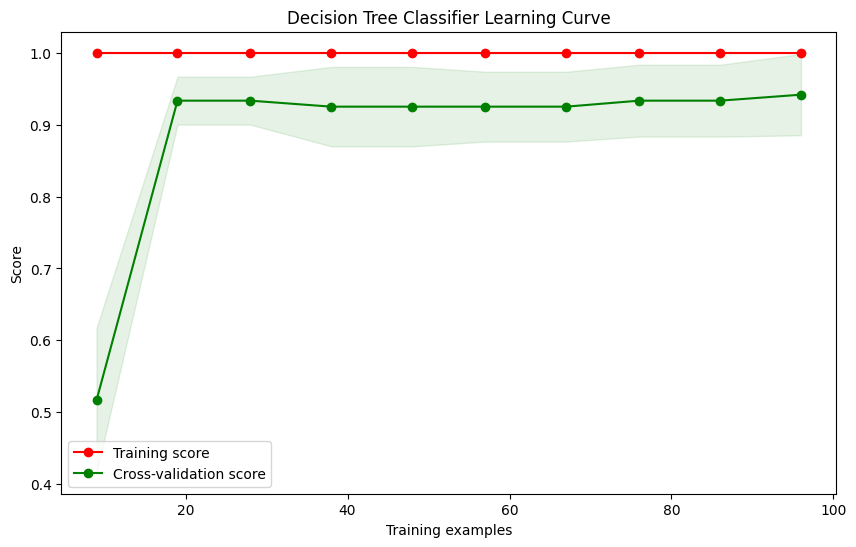

In [8]:
from sklearn.model_selection import cross_val_score, learning_curve
import numpy as np
import matplotlib.pyplot as plt

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

y_pred_train_dt = dt_classifier.predict(X_train)
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)

cv_scores_dt = cross_val_score(dt_classifier, X_train, y_train, cv=5, scoring='accuracy')

print("Decision Tree Classifier - Training Set Accuracy:", accuracy_train_dt)
print("Decision Tree Classifier - Cross-Validation Scores:", cv_scores_dt)
print("Mean Cross-Validation Score:", np.mean(cv_scores_dt))
print("Standard Deviation of Cross-Validation Scores:", np.std(cv_scores_dt))

train_sizes, train_scores, test_scores = learning_curve(dt_classifier, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.legend(loc="best")
plt.title("Decision Tree Classifier Learning Curve")
plt.show()


# #Apply Unsupervised Models (K-means Clustering)

/Users/rohitpoddar/anaconda3/envs/ineubytes/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


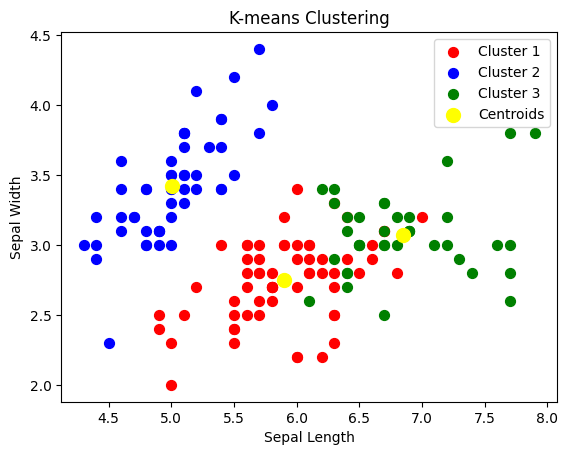

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X)

data['cluster'] = clusters

plt.scatter(X.iloc[clusters == 0, 0], X.iloc[clusters == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X.iloc[clusters == 1, 0], X.iloc[clusters == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X.iloc[clusters == 2, 0], X.iloc[clusters == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='yellow', label='Centroids')
plt.legend()
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('K-means Clustering')
plt.show()
